In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers import Cropping2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import *

import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


In [2]:
data = np.load('datas/dataset_resized.npz')
X_train = data["X"]
y_train = data["y"]

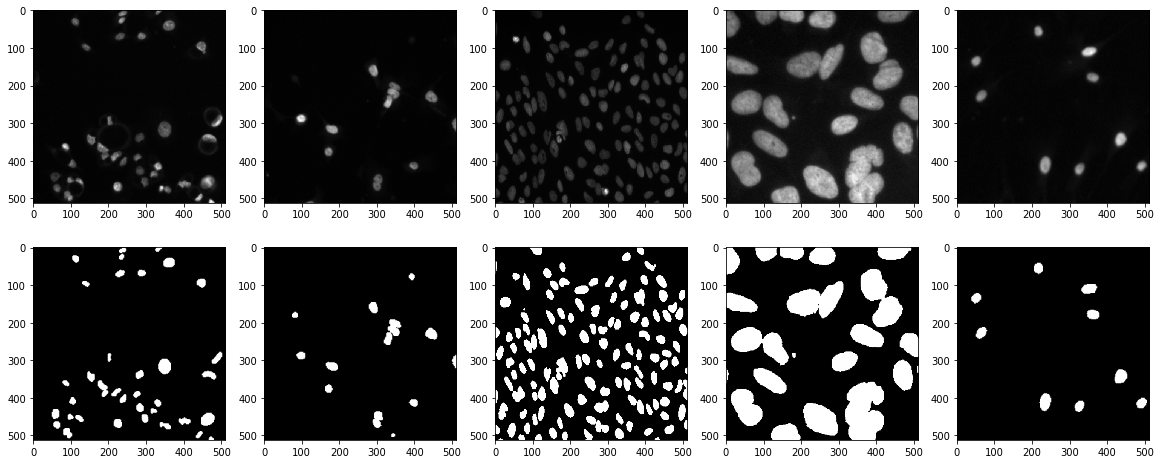

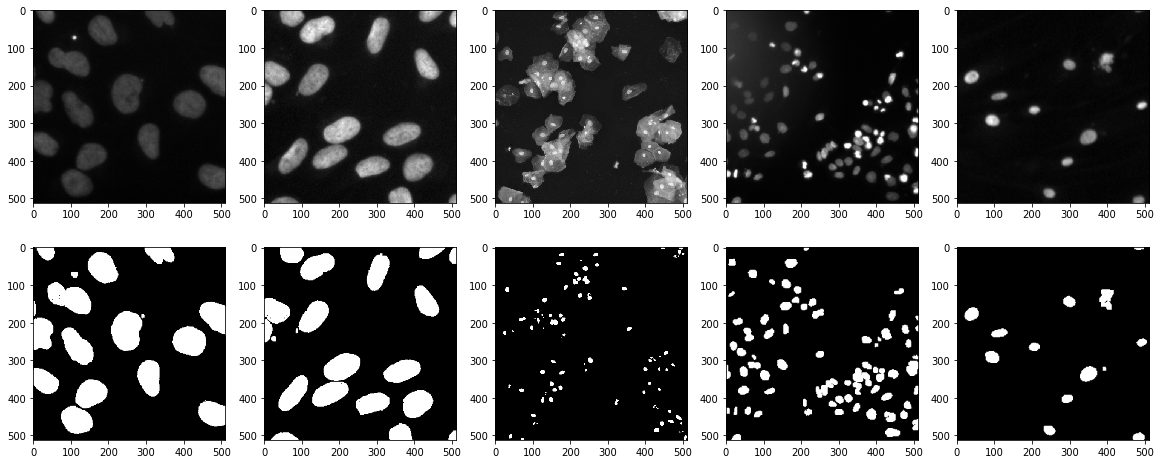

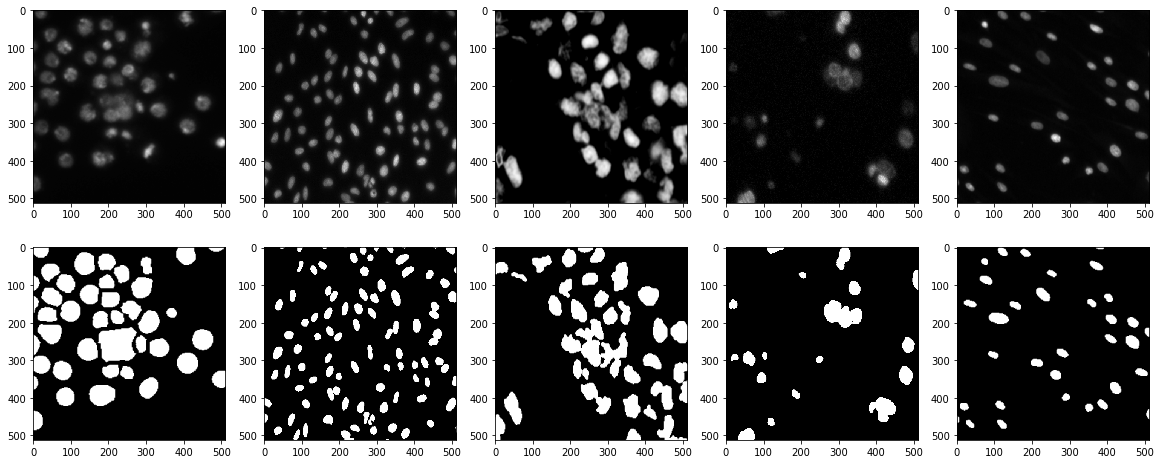

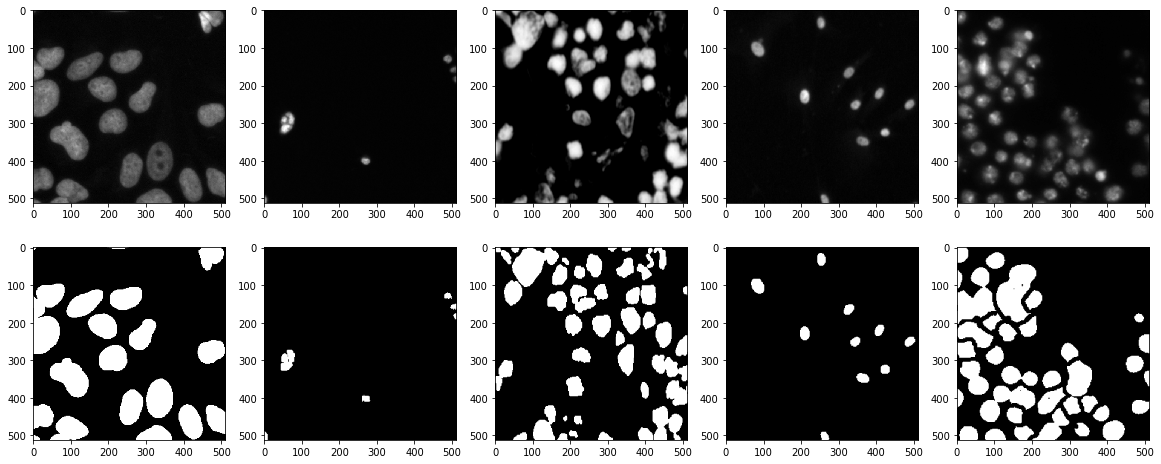

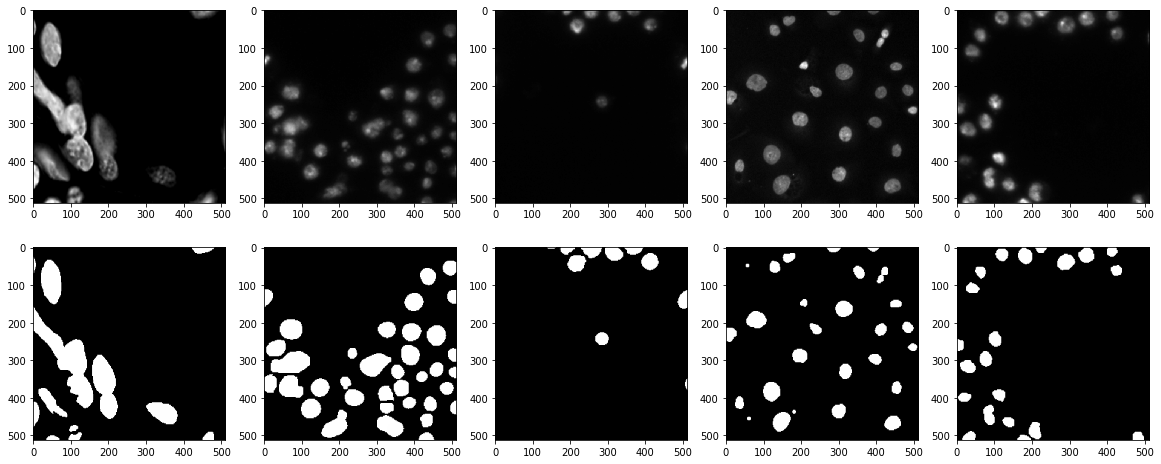

In [3]:
data_gen_args = {
#     "rotation_range" : 90.,
#     "width_shift_range" : 0.1,
#     "height_shift_range" : 0.1,
#     "zoom_range" : 0.2,
#     "shear_range" : 0.2,
    "fill_mode" : "constant",
#     "cval" : 0,
    "horizontal_flip" : True,
    "vertical_flip" : True,
    "data_format" : "channels_last",
    "rescale" : 1./255
}

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

seed = 1
image_datagen.fit(X_train, augment=False, seed=seed)
mask_datagen.fit(y_train, augment=False, seed=seed)

image_generator = image_datagen.flow(X_train, batch_size=5, seed=seed)
mask_generator = mask_datagen.flow(y_train, batch_size=5, seed=seed)

train_generator = zip(image_generator, mask_generator)

i = 0
for a, b in train_generator:
    i += 1
    if i<=5:
        f, axarr = plt.subplots(2, 5, figsize=(20,8))
        for idx in range(5):
            axarr[0, idx].imshow(a[idx, :, : , 0].astype(np.float64), cmap='gray')
            axarr[1, idx].imshow(b[idx, :, : , 0].astype(np.float64), cmap='gray')
        plt.show()
    else:
        break